# Auto-encoder vs PCA avec le jeu de données MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


##### Création des échantillons d'apprentissage et de test à partir du jeu de données MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


### 1) Simple auto-encoder with keras

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

##### 1.1 Build an auto-encoder architecture

In [7]:
# Size of our encoded representations (compression of input image from 784 floats to 32 floats)
encoding_dim = 32 

# Input placeholder :
input_img = Input(shape=(784,))

# Encoded representation of the input (="encoded") :
encoded = Dense(encoding_dim, activation='linear')(input_img)
# Lossy reconstruction of the input (="decoded") :
decoded = Dense(784, activation='linear')(encoded)

# Model maps an input to its encoded representation :
encoder = Model(input_img, encoded)
# Model maps an input to its reconstruction :
autoencoder = Model(input_img, decoded)

# Placeholder for an encoded (32-dimensional) input :
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
# Pass optimizer (adadelta) with a 'mean squared error" loss
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

##### 1.2 Trained an auto-encoder and predict while keeping endoded and decoded image at each period (for convergence analysis)

In [ ]:
encoded_imgs=[]
decoded_imgs=[]

# Loop equal to the number of training periods :
# (if we didn't want to register parameter at each periods, we could directly put nb_periods=50 without "for" loop)
for i in np.arange(50):
    autoencoder.fit(x_train, x_train,nb_epoch=1, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

    # encode and decode some digits
    if i==0 :
        encoded_imgs.append(encoder.predict(x_test))
        decoded_imgs.append(decoder.predict(encoded_imgs))
    else:
        encoded_imgs.append(encoder.predict(x_test))
        decoded_imgs.append(decoder.predict(encoded_imgs[i]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 3s - loss: 0.0469 - val_loss: 0.0428 1536/60000 [..............................] - ETA: 2s - loss: 0.0518

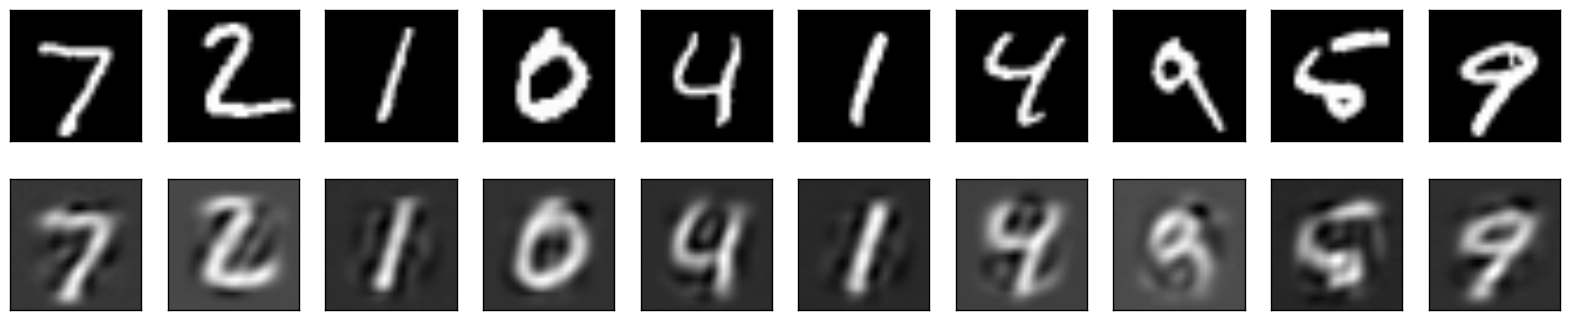

In [10]:
n = 10  # Number of digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[-1][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

With 50 more periods :

In [ ]:
for i in np.arange(50,100):
    autoencoder.fit(x_train, x_train,nb_epoch=1, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

    encoded_imgs.append(encoder.predict(x_test))
    decoded_imgs.append(decoder.predict(encoded_imgs[i]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 3s - loss: 0.0176 - val_loss: 0.0172  512/60000 [..............................] - ETA: 13s - loss: 0.0174

Display initial and decoded images

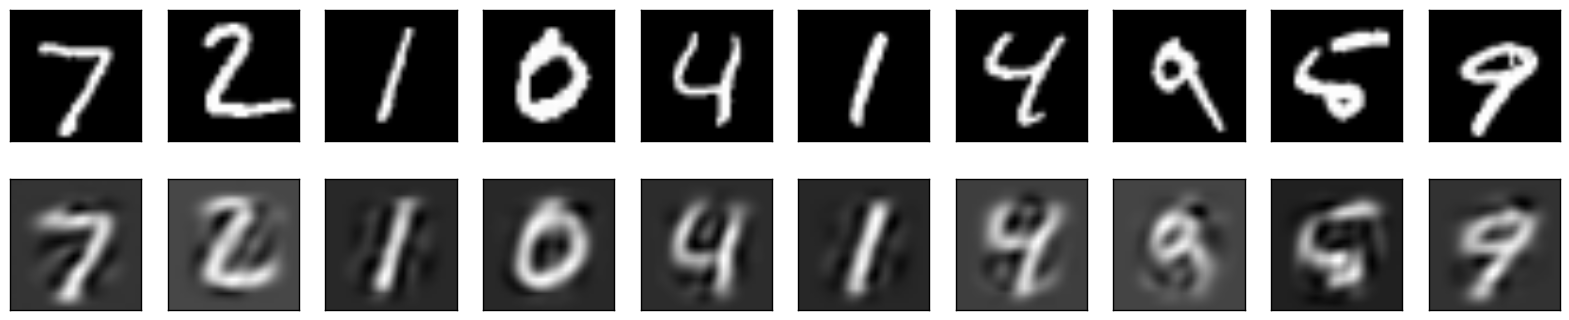

In [18]:
n = 10  # Number of digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[-1][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

##### 1.3 Display decoded images after different numbers of periods

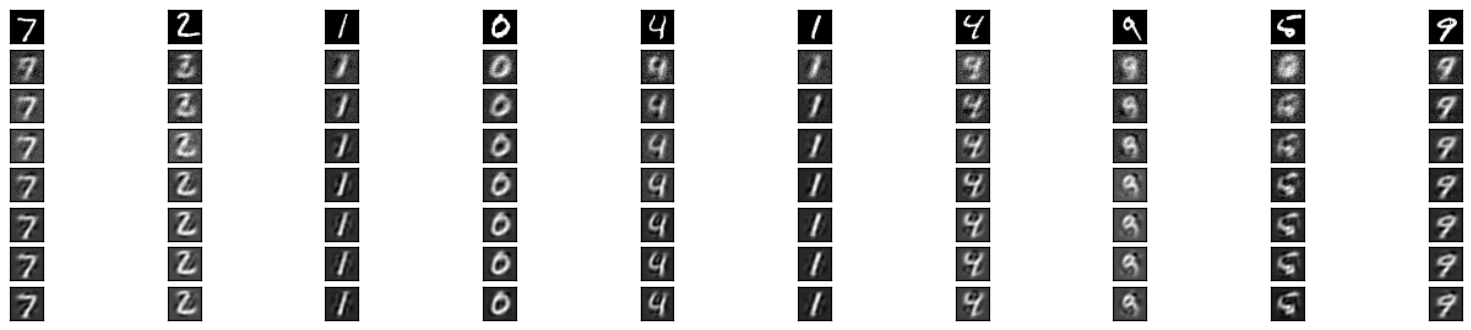

In [29]:
n = 10  # Number of digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(8, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 1 period
    ax = plt.subplot(8, n, i + 1 + n)
    plt.imshow(decoded_imgs[0][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction after 5 periods
    ax = plt.subplot(8, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[4][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 10 periods
    ax = plt.subplot(8, n, i + 1 + 3*n)
    plt.imshow(decoded_imgs[9][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 20 periods
    ax = plt.subplot(8, n, i + 1 + 4*n)
    plt.imshow(decoded_imgs[19][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 40 periods
    ax = plt.subplot(8, n, i + 1 + 5*n)
    plt.imshow(decoded_imgs[39][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
                               
    # display reconstruction after 50 periods
    ax = plt.subplot(8, n, i + 1 + 6*n)
    plt.imshow(decoded_imgs[49][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
                               
    # display reconstruction after 100 periods
    ax = plt.subplot(8, n, i + 1 + 7*n)
    plt.imshow(decoded_imgs[99][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 2) Principal Component Analysis (PCA)

In [24]:
from sklearn.decomposition import PCA

##### 2.1 PCA with 32 axis

In [25]:
pca = PCA(n_components=32)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### 2.2 Application on test sample

In [26]:
X_test_transform=pca.transform(x_test)
X_test_decoded=pca.inverse_transform(X_test_transform)

##### 2.3 Display decoded images on test sample

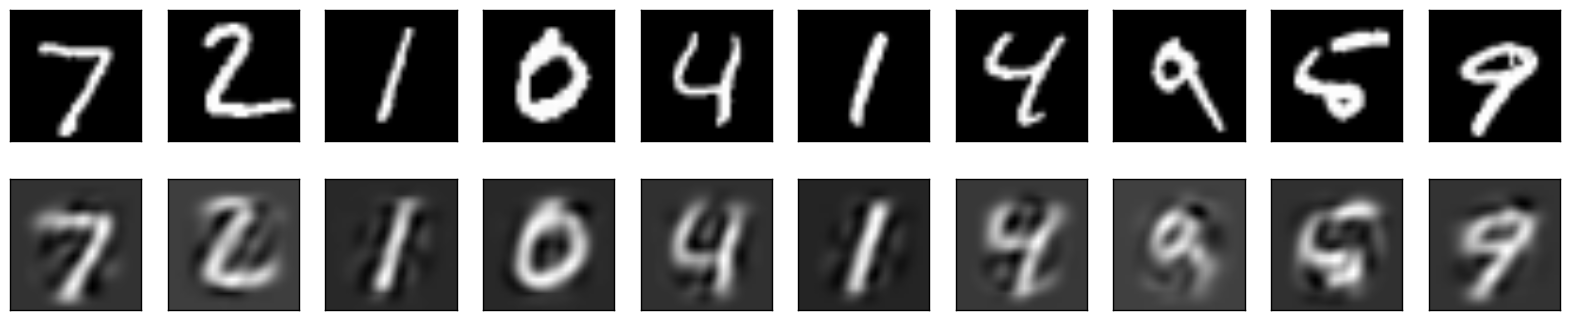

In [28]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 3) Non linear deep Auto-encoder

##### 3.1 Build an non linear deep auto-encoder architecture

In [31]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

deepautoencoder = Model(input_img, decoded)
deepautoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

##### 3.2 Trained an auto-encoder and predict while keeping endoded and decoded image at each period (for convergence analysis)

In [ ]:
deep_decoded_imgs=[]

# Loop equal to the number of training periods :
# (if we didn't want to register parameter at each periods, we could directly put nb_periods=50 without "for" loop)
for i in np.arange(50):
    deepautoencoder.fit(x_train, x_train,nb_epoch=1, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

    # encode and decode some digits
    deep_decoded_imgs.append(deepautoencoder.predict(x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 8s - loss: 0.1196 - val_loss: 0.0699

##### 3.3 Display decoded images after different numbers of periods

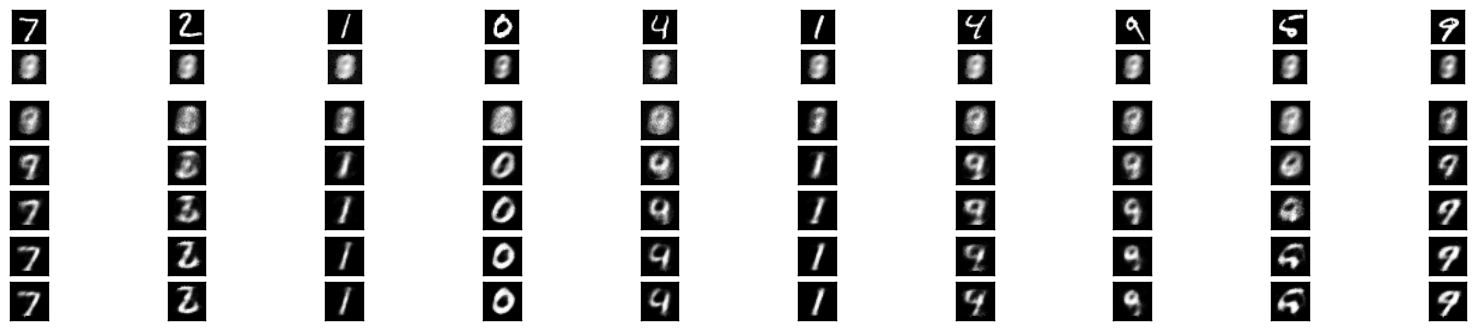

In [33]:
n = 10  # Number of digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(8, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 1 period
    ax = plt.subplot(8, n, i + 1 + n)
    plt.imshow(deep_decoded_imgs[0][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction after 5 periods
    ax = plt.subplot(7, n, i + 1 + 2*n)
    plt.imshow(deep_decoded_imgs[4][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 10 periods
    ax = plt.subplot(7, n, i + 1 + 3*n)
    plt.imshow(deep_decoded_imgs[9][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 20 periods
    ax = plt.subplot(7, n, i + 1 + 4*n)
    plt.imshow(deep_decoded_imgs[19][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction after 40 periods
    ax = plt.subplot(7, n, i + 1 + 5*n)
    plt.imshow(deep_decoded_imgs[39][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
                               
    # display reconstruction after 50 periods
    ax = plt.subplot(7, n, i + 1 + 6*n)
    plt.imshow(deep_decoded_imgs[49][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
                               
plt.show()

### 4) Tester la convergence de $\hat{X}^{AE}$ par rapport à $\hat{X}^{PCA}$

In [36]:
j=0 # Image j
difference=[]
for i in np.arange(100):
    difference.append(np.linalg.norm(decoded_imgs[i]-X_test_decoded,axis=0)[j])

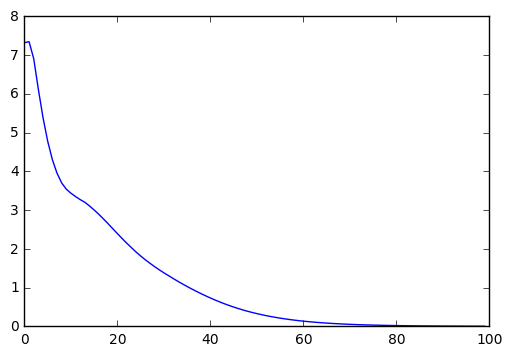

In [37]:
plt.plot(difference)

### 5) Vérifier la cohérence des résultats (comparaison des labels en sortie)

Nous réalisons un modèle SVM pour identifier le label associé à chaque image. Nous effectuons l'apprentissage sur l'échantillon de test (x_test) puis nous l'appliquons sur les images décompressées (decoded_imgs[9] et X_test_decoded).

In [38]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(x_test, y_test)

In [40]:
y_pred_AE = clf.predict(decoded_imgs[49])
y_pred_PCA = clf.predict(X_test_decoded)
y_pred_deepAE = clf.predict(deep_decoded_imgs[49])

In [89]:
print("Pourcentage de labels égaux :", round(100*len(y_pred_AE[(y_pred_AE-y_pred_PCA)==0])/len(y_pred_AE)), "%")

Pourcentage de labels égaux : 9 %


In [41]:
print("Pourcentage de labels égaux entre AE et PCA :", round(100*len(y_pred_AE[(y_pred_AE-y_pred_PCA)==0])/len(y_pred_AE)), "%")

Pourcentage de labels égaux entre AE et PCA : 99 %


In [42]:
print("Pourcentage de labels égaux entre deep AE et PCA :", round(100*len(y_pred_deepAE[(y_pred_deepAE-y_pred_PCA)==0])/len(y_pred_deepAE)), "%")

Pourcentage de labels égaux entre deep AE et PCA : 93 %


In [43]:
print("Pourcentage de labels égaux entre deep AE et simple AE :", round(100*len(y_pred_deepAE[(y_pred_deepAE-y_pred_AE)==0])/len(y_pred_deepAE)), "%")

Pourcentage de labels égaux entre deep AE et simple AE : 93 %


### 6) Comparer les erreurs de classification (Simple AE vs deep AE vs PCA) sur échantillon de test 

In [44]:
print("Pourcentage d'erreur de classification avec AE :", round(100*len(y_pred_AE[(y_pred_AE-y_test)!=0])/len(y_pred_AE)), "%")

Pourcentage d'erreur de classification avec AE : 9 %


In [45]:
print("Pourcentage d'erreur de classification avec PCA :", round(100*len(y_pred_AE[(y_pred_PCA-y_test)!=0])/len(y_pred_PCA)), "%")

Pourcentage d'erreur de classification avec PCA : 8 %


In [46]:
print("Pourcentage d'erreur de classification avec deep AE :", round(100*len(y_pred_deepAE[(y_pred_deepAE-y_test)!=0])/len(y_pred_deepAE)), "%")

Pourcentage d'erreur de classification avec deep AE : 12 %
